# Benford's Law

### Assignment: Observing Benford's Law with Newspaper Data

#### Objective

To collect numbers from the front page of a newspaper, analyze the distribution of their leading digits, and compare the observed distribution to the expected distribution according to Benford's Law.

### Steps

1. **Choose a Source**:
   - Select a recent newspaper (print or online) that includes a variety of numbers on its front page. Ideally, choose a paper that covers a range of topics such as finance, demographics, and science.

2. **Collect Data**:
   - Gather at least 100 numbers from the front page. Ensure that the numbers are varied and span different orders of magnitude. Include numbers related to:
     - Financial data (e.g., stock prices, GDP figures, company revenues)
     - Demographic data (e.g., population counts, statistics)
     - Scientific data (e.g., measurements, distances, areas)

3. **Extract Leading Digits**:
   - Extract the first digit of each number in your dataset. Ensure the data is in numeric form and discard any non-numeric entries.

4. **Calculate Observed Distribution**:
   - Count the frequency of each leading digit (1 through 9).
   - Calculate the relative frequency by dividing the count of each digit by the total number of data points.

5. **Compare with Benford's Law**:
   - Calculate the expected frequency of each digit using Benford's Law:
     $$
     P(d) = \log_{10}\left(1 + \frac{1}{d}\right)
     $$
   - Compare the observed distribution to the expected distribution.

6. **Visualize the Results**:
   - Create a bar chart showing the observed frequencies and the expected frequencies according to Benford's Law.

7. **Analyze and Conclude**:
   - Discuss whether the numbers from the newspaper follow Benford's Law.
   - Explain any deviations and consider factors that might influence the distribution.

### Example Analysis

#### Choosing and Collecting Data

Select a diverse newspaper front page with a variety of numbers. For example, you might find:
- Financial figures such as stock prices and company earnings.
- Population statistics from demographic reports.
- Scientific measurements like distances or quantities.

#### Extracting Leading Digits

After gathering your numbers, extract the first digit of each:
- If the number is 1,234, the leading digit is 1.
- If the number is 78.9, the leading digit is 7.

#### Calculating and Comparing Distributions

Count the frequency of each leading digit and compare it to the theoretical distribution predicted by Benford's Law. Benford's Law predicts:
- 1 appears as the leading digit about 30% of the time.
- 2 appears about 17.6% of the time.
- The frequency decreases logarithmically for higher digits.

### Why It Works

Benford's Law works because many real-world datasets involve numbers that span multiple orders of magnitude and often result from multiplicative processes. These processes include growth rates, financial transactions, and natural measurements. 

### Conclusion

By following these steps, you can observe Benford's Law in action with real-world data from the front page of a newspaper. This exercise demonstrates the law's applicability to naturally occurring datasets and helps you understand the underlying principles of logarithmic distribution and multiplicative processes.

# Benford's Law and Multiplicative Processes

#### Multiplicative Processes Explained

Multiplicative processes are fundamental to why Benford's Law appears in many natural datasets. These processes involve quantities that grow or shrink by a constant percentage rather than by a fixed amount. Here’s a deeper look:

1. **Exponential Growth and Decay**:
   - **Financial Growth**: Suppose you have a bank account that grows by 5% annually. The amount \(A(t)\) in the account grows multiplicatively:
     $$
     A(t) = A_0 \times (1 + r)^t
     $$
     where \(A_0\) is the initial amount, \(r\) is the interest rate, and \(t\) is time.
   - **Population Growth**: Populations often grow at a constant percentage rate, leading to exponential growth:
     $$
     P(t) = P_0 \times e^{rt}
     $$
     where \(P_0\) is the initial population, \(r\) is the growth rate, and \(t\) is time.
   - **Radioactive Decay**: The amount of a radioactive substance decreases exponentially over time:
     $$
     N(t) = N_0 \times e^{-\lambda t}
     $$
     where \(N_0\) is the initial quantity, \(\lambda\) is the decay constant, and \(t\) is time.

2. **Logarithmic Transformation**:
   - When you take the logarithm of numbers resulting from multiplicative processes, their logarithms tend to be uniformly distributed. This uniform distribution of logarithms results in the non-uniform distribution of leading digits predicted by Benford's Law.

#### Why We See Benford's Law Everywhere

1. **Wide Range of Magnitudes**:
   - Real-world datasets often span several orders of magnitude. For instance, financial transactions can range from a few cents to millions of dollars, and scientific measurements can span from nanometers to kilometers.

2. **Logarithmic Scale**:
   - On a logarithmic scale, the interval for the digit 1 is larger than for higher digits. For example, numbers starting with 1 occupy the interval from $ \log_{10}(1) = 0 $ to $ \log_{10}(2) \approx 0.301 $, while numbers starting with 9 occupy the interval from $ \log_{10}(9) \approx 0.954 $ to $ \log_{10}(10) = 1 $.

### Mathematical Explanation

The probability \( P(d) \) that a number starts with digit \( d \) is given by:
$$
P(d) = \log_{10}\left(1 + \frac{1}{d}\right)
$$
This can be understood by considering the intervals on a logarithmic scale.

For example:
- For a number to start with 1:
  $$
  1 \leq x < 2 \quad \text{(linear scale)}
  $$
  $$
  0 \leq \log_{10}(x) < \log_{10}(2) \approx 0.301 \quad \text{(logarithmic scale)}
  $$
- For a number to start with 2:
  $$
  2 \leq x < 3
  $$
  $$
  \log_{10}(2) \approx 0.301 \leq \log_{10}(x) < \log_{10}(3) \approx 0.477
  $$

The length of the interval for digit 1 is larger than for digit 2, which is larger than for digit 3, and so on, leading to a higher probability of 1 being the first digit.

### Visualizing Benford's Law with Code

To visualize this, we can generate data that spans multiple orders of magnitude and plot the distribution of the first digits against the expected distribution according to Benford's Law.

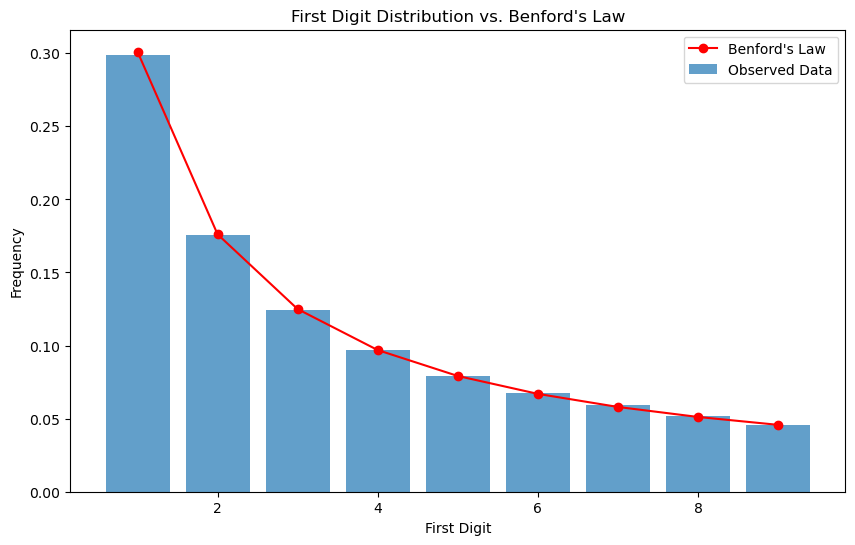

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def benford_distribution(digit):
    '''Calculate the Benford's Law probability for a given digit'''
    return np.log10(1 + 1 / digit)

def generate_exponential_data(size, min_exp, max_exp):
    '''Generate exponentially spaced data over several orders of magnitude'''
    exponents = np.random.uniform(min_exp, max_exp, size)
    data = np.power(10, exponents)
    first_digits = [int(str(num)[0]) for num in data]
    return first_digits

def plot_benford_law_with_observed(first_digits):
    '''Plot the distribution of first digits against Benford's Law'''
    counts = np.bincount(first_digits)[1:10]
    total_counts = sum(counts)
    frequencies = counts / total_counts
    
    benford_probabilities = [benford_distribution(d) for d in range(1, 10)]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 10), frequencies, alpha=0.7, label='Observed Data')
    plt.plot(range(1, 10), benford_probabilities, 'ro-', label='Benford\'s Law')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.title('First Digit Distribution vs. Benford\'s Law')
    plt.legend()
    plt.grid(False)
    plt.show()

# Generate and plot data
sample_size = 100000
min_exp = 0
max_exp = 5
first_digits = generate_exponential_data(sample_size, min_exp, max_exp)
plot_benford_law_with_observed(first_digits)

### Explanation of the Code

1. **Function `benford_distribution`**: Calculates the expected probability for each digit according to Benford's Law.
2. **Function `generate_exponential_data`**: Generates data by sampling exponents uniformly over a specified range (from `min_exp` to `max_exp`) and then transforming these exponents back to the original scale using $10^{\text{exponent}}$. This simulates real-world data spanning multiple orders of magnitude.
3. **Function `plot_benford_law_with_observed`**: Plots the observed distribution of first digits and compares it to the expected distribution according to Benford's Law.

### Conclusion

By generating data that spans multiple orders of magnitude and visualizing the leading digit distribution, we can observe that the data follows Benford's Law. This helps demonstrate why Benford's Law applies to datasets that span multiple orders of magnitude and arise from real-world, multiplicative processes. This law doesn't apply to datasets with numbers confined to a small range or generated uniformly within a small interval.

# Examples of Benford's Law

### Example 1: Financial Data from Yahoo Finance

You can use financial data such as stock prices, which often follow Benford's Law.

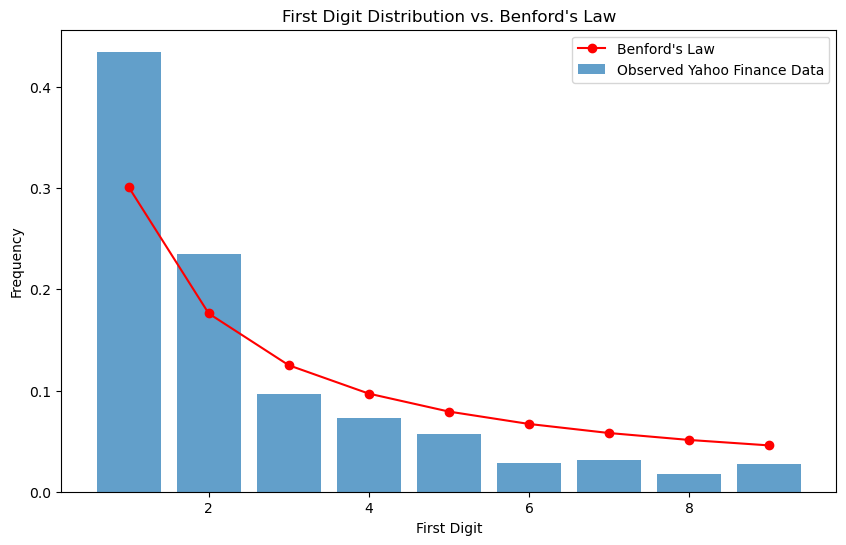

In [110]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def fetch_stock_data(tickers):
    all_data = []
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        hist = stock.history(period="max")  # Fetch maximum historical data
        closing_prices = hist['Close'].dropna().tolist()
        all_data.extend(closing_prices)
    return all_data

def benford_distribution(digit):
    '''Calculate the Benford's Law probability for a given digit'''
    return np.log10(1 + 1 / digit)

def plot_benford_law_with_observed(first_digits):
    '''Plot the distribution of first digits against Benford's Law'''
    counts = np.zeros(10, dtype=int)
    observed_counts = np.bincount(first_digits)
    counts[:len(observed_counts)] = observed_counts
    
    total_counts = sum(counts[1:10])
    frequencies = counts[1:10] / total_counts
    
    benford_probabilities = [benford_distribution(d) for d in range(1, 10)]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 10), frequencies, alpha=0.7, label='Observed Yahoo Finance Data')
    plt.plot(range(1, 10), benford_probabilities, 'ro-', label='Benford\'s Law')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.title('First Digit Distribution vs. Benford\'s Law')
    plt.legend()
    plt.grid(False)
    plt.show()

tickers = ['AAPL', 'MSFT', 'GOOG']  # Example tickers
all_data = fetch_stock_data(tickers)
first_digits = [int(str(price)[0]) for price in all_data if price > 0]

plot_benford_law_with_observed(first_digits)


### Example 2: Population Data from World Bank API

You can use population data from the World Bank API, which is publicly available and typically follows Benford's Law.

In [112]:
import requests
import json

def fetch_population_data():
    url = 'http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&per_page=500'
    response = requests.get(url)
    data = response.json()
    populations = []
    
    for entry in data[1]:
        population = entry.get('value')
        if population:
            populations.append(population)
    
    return populations

populations = fetch_population_data()
first_digits = [int(str(pop)[0]) for pop in populations if pop > 0]

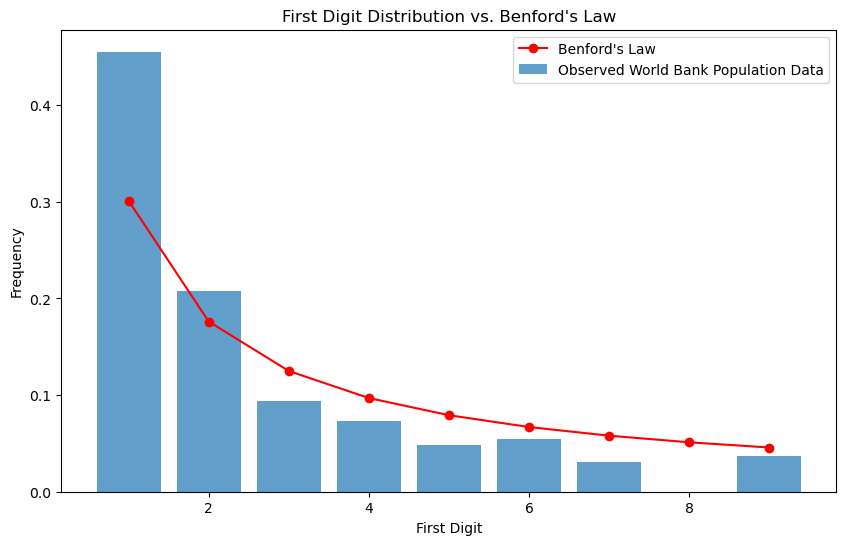

In [113]:
import matplotlib.pyplot as plt
import numpy as np

def benford_distribution(digit):
    '''Calculate the Benford's Law probability for a given digit'''
    return np.log10(1 + 1 / digit)

def plot_benford_law_with_observed(first_digits):
    '''Plot the distribution of first digits against Benford's Law'''
    counts = np.bincount(first_digits)[1:10]
    total_counts = sum(counts)
    frequencies = counts / total_counts
    
    benford_probabilities = [benford_distribution(d) for d in range(1, 10)]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 10), frequencies, alpha=0.7, label='Observed World Bank Population Data')
    plt.plot(range(1, 10), benford_probabilities, 'ro-', label='Benford\'s Law')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.title('First Digit Distribution vs. Benford\'s Law')
    plt.legend()
    plt.grid(False)
    plt.show()

plot_benford_law_with_observed(first_digits)

### Example 3: Scientific Data from NASA

You can use astronomical data from NASA, which spans multiple orders of magnitude.

In [114]:
import requests

def fetch_neo_data(api_key):
    url = 'https://api.nasa.gov/neo/rest/v1/neo/browse'
    params = {
        'api_key': api_key,
        'size': 1000  # Fetch 1000 entries
    }
    response = requests.get(url, params=params)
    data = response.json()
    diameters = []
    
    for neo in data['near_earth_objects']:
        diameter = neo['estimated_diameter']['kilometers']['estimated_diameter_max']
        diameters.append(diameter)
    
    return diameters

# Use your NASA API key here
api_key = 'DEMO_KEY'
diameters = fetch_neo_data(api_key)
first_digits = [int(str(diameter)[0]) for diameter in diameters if diameter > 0]

# Now we have the first digits, we can proceed with the analysis


### Analyzing the Data

Once you have the data, you can analyze the distribution of the first digits and compare it to Benford's Law.

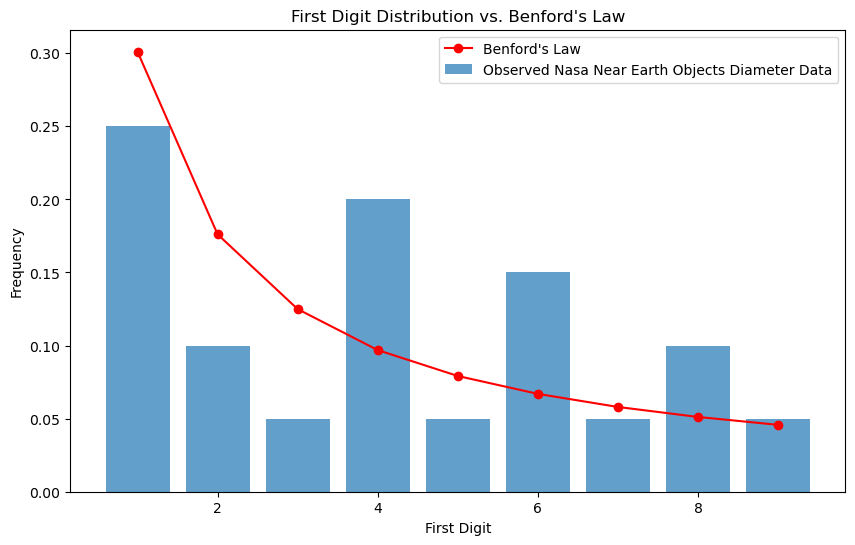

In [116]:
import matplotlib.pyplot as plt
import numpy as np

def benford_distribution(digit):
    '''Calculate the Benford's Law probability for a given digit'''
    return np.log10(1 + 1 / digit)

def plot_benford_law_with_observed(first_digits):
    '''Plot the distribution of first digits against Benford's Law'''
    counts = np.bincount(first_digits)[1:10]
    total_counts = sum(counts)
    frequencies = counts / total_counts
    
    benford_probabilities = [benford_distribution(d) for d in range(1, 10)]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 10), frequencies, alpha=0.7, label='Observed Nasa Near Earth Objects Diameter Data')
    plt.plot(range(1, 10), benford_probabilities, 'ro-', label='Benford\'s Law')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.title('First Digit Distribution vs. Benford\'s Law')
    plt.legend()
    plt.grid(False)
    plt.show()

plot_benford_law_with_observed(first_digits)

### Conclusion

By fetching real-world data from sources like financial markets, population statistics, or scientific databases, you can observe how well they follow Benford's Law. This process not only demonstrates the law in action but also provides valuable insights into the distribution of data across different fields.